# Team 11: Predicting the Impact of Twitter Posts on Bitcoin Prices

**Group Members:**  Andrey Bartashevich (14586517), Finn Prins (13458434), Duco Trompert (14591227)

**Research Question:** Can Twitter (a.k.a. X) posts of famous people influence the prices of Bitcoin?

# Hypothesis: 
**Null hypothesis:** There is no impact of Twitter  posts by individuals with over one million followers on the Bitcoin price movements.

**Alternative Hypothesis:** There is an impact of Twitter posts by individuals with over one million followers on the Bitcoin price movements


**Potentialy change the 1 mill foloowers with 250 000 followers, because the dataset doesnt have enough values for users with 1 000 000 followers.**

**Imports**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Processing**

Twitter dataset

In [29]:
#open twitter csv file
tweet = pd.read_csv('data/tweets.csv', delimiter=';', lineterminator='\n')
#rename timestamp and text\r columns 
tweet.rename(columns={'timestamp' : 'date','text\r' : 'text'}, inplace=True)
#convert data to datetime format, and drop timezone information as it irrelevant
tweet['date'] = pd.to_datetime(tweet['date']).dt.tz_localize(None)
#rounding seconds in date for consistency with bitcoin dataset
tweet['date'] = tweet['date'].dt.round('T')
#specified columns
tweet[['date', 'user', 'fullname', 'replies', 'likes', 'retweets', 'text']].head()

/var/folders/d6/qmvkgm9x2kq_2htc9f1yhtb00000gn/T/ipykernel_16781/4214178925.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet = pd.read_csv('data/tweets.csv', delimiter=';', lineterminator='\n')


,date,user,fullname,replies,likes,retweets,text
0,2019-05-27 11:49:00,KamdemAbdiel,Abdiel kamdem,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:00,bitcointe,Bitcointe,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:00,3eyedbran,Bran - 3 Eyed Raven,0,2,1,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:00,DetroitCrypto,J. Scardina,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:00,mmursaleen72,Muhammad Mursaleen,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


Bitcoin dataset

In [30]:
#open bitcoin csv
bitcoin = pd.read_csv('data/btcusd_1-min_data.csv')
#renaming timestamp, Close and Volume columns 
bitcoin.rename(columns={'Timestamp' : 'date','Close': 'price', 'Volume' : 'volume'}, inplace=True)
#converting date into datetime
bitcoin['date'] = pd.to_datetime(bitcoin['date'], unit='s')
#specified columns
bitcoin[['date','price','volume']].head()


,date,price,volume
0,2012-01-01 10:01:00,4.58,0.0
1,2012-01-01 10:02:00,4.58,0.0
2,2012-01-01 10:03:00,4.58,0.0
3,2012-01-01 10:04:00,4.58,0.0
4,2012-01-01 10:05:00,4.58,0.0


Merging two datasets

In [31]:
#mergin two datasets by date
merged = pd.merge(tweet[['date', 'user', 'fullname', 'replies', 'likes', 'retweets', 'text']],
                  bitcoin[['date', 'price', 'volume']], on='date', how='inner')
merged.head()


,date,user,fullname,replies,likes,retweets,text,price,volume
0,2019-05-27 11:49:00,KamdemAbdiel,Abdiel kamdem,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...,8785.54,1.250155
1,2019-05-27 11:49:00,bitcointe,Bitcointe,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...,8785.54,1.250155
2,2019-05-27 11:49:00,3eyedbran,Bran - 3 Eyed Raven,0,2,1,Another Test tweet that wasn't caught in the s...,8785.54,1.250155
3,2019-05-27 11:49:00,DetroitCrypto,J. Scardina,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,8785.54,1.250155
4,2019-05-27 11:49:00,mmursaleen72,Muhammad Mursaleen,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,8785.54,1.250155


Data visualization

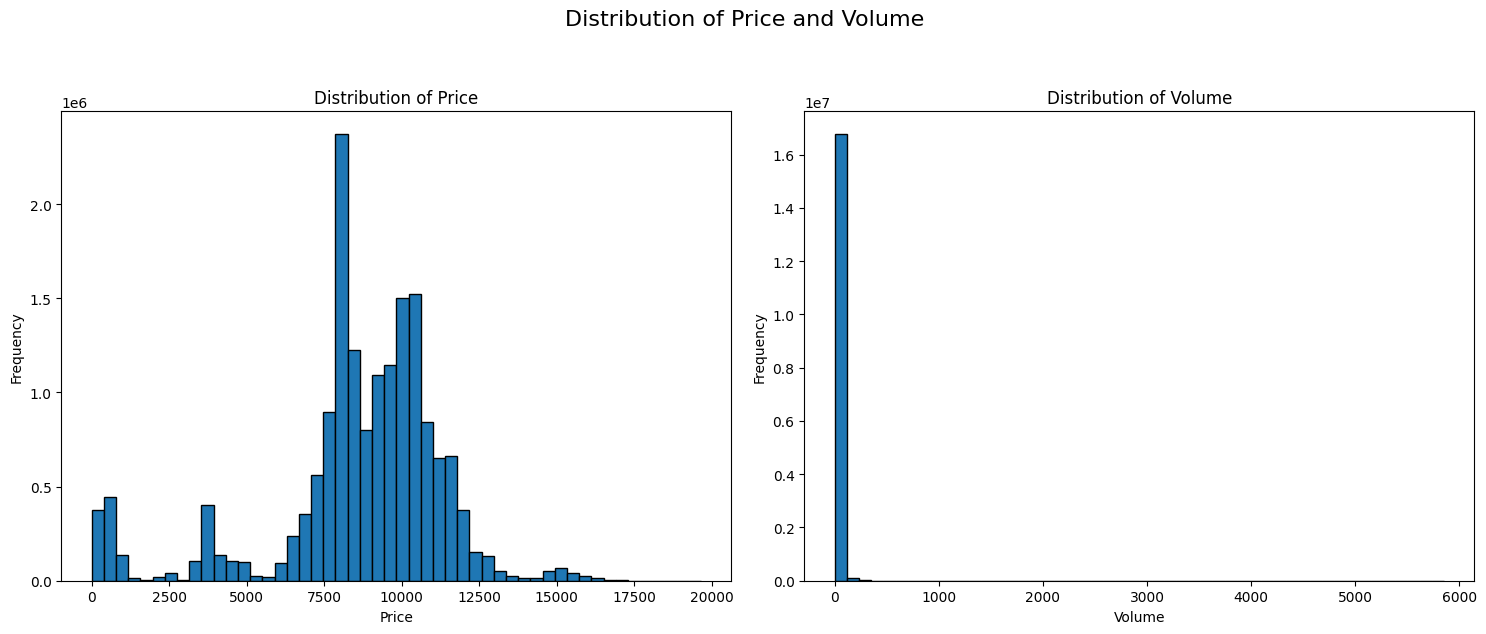

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of Price and Volume', fontsize=16, y=1.05)
ax1.hist(merged['price'], bins=50, edgecolor='black')
ax1.set_title('Distribution of Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax2.hist(merged['volume'], bins=50, edgecolor='black')
ax2.set_title('Distribution of Volume')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()